In [1]:
%matplotlib inline
import sys 
import xarray as xr
import numpy as np
import os 
import math

coords = xr.open_dataset('/home/jvalenti/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/home/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')

filename=['/home/jvalenti/projects/rrg-allen/jvalenti/alpha020190101.nc']

In [26]:
mask.gdepw_0[0,:,1,1].values

[  0.          1.0000012   2.0000064   3.0000193   4.0000467   5.000104
   6.000217    7.0004406   8.000879    9.001736   10.003407   11.006662
  12.013008   13.025366   14.049429   15.096255   16.187304   17.364035
  18.705973   20.363474   22.613064   25.937412   31.101034   39.11886
  50.963238   67.05207    86.96747   109.73707   134.34593   160.02956
 186.30528   212.89656   239.65305   266.4952    293.3816    320.29077
 347.2116    374.1385    401.06845   428.       ]


In [2]:
str1 = "Correct cell not found for"
with open("/home/jvalenti/scratch/OParcels_runs/Parcels_alpha/results/stdajulout","r") as movinf:
    listp = movinf.readlines()
lon = []
lat = []
for i in range(0, len(listp)):
    if str1 in listp[i]:
        # do something
        lat.append(float(listp[i].split('(')[1].split(',')[1].split(')')[0]))
        lon.append(float(listp[i].split('(')[1].split(',')[0]))

In [3]:
np.polyfit(coords.nav_lon[2,:],coords.nav_lat[2,:],1)

array([ 0.35157547, 90.26497859])

In [4]:
47*2.84-256

-122.52000000000001

In [5]:
-123.5*0.35112579 + 90.19978543

46.83575036500001

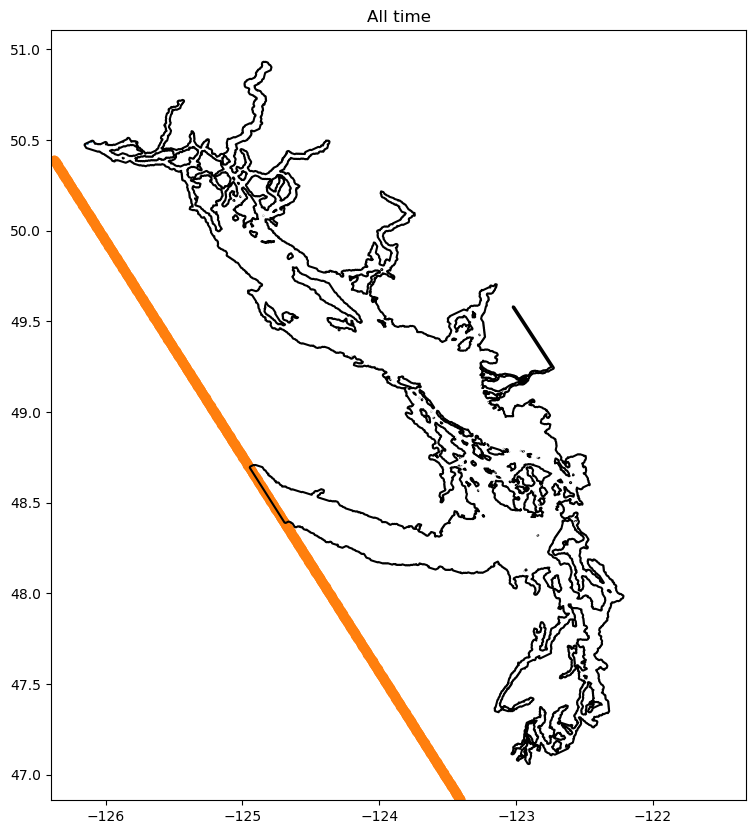

In [6]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(16, 10))
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
ax.set_aspect(1/np.sin(np.deg2rad(49)))
ax.set_title('All time')
#plt.xlim(-122.685963-0.125,-122.685963+0.125)
#plt.ylim(47.123597-0.125,47.123597+0.125)
plt.scatter(lon,lat,s=1)
plt.scatter(coords.nav_lat[:,1]* -0.84122918 -83.98618424, coords.nav_lat[:,1])

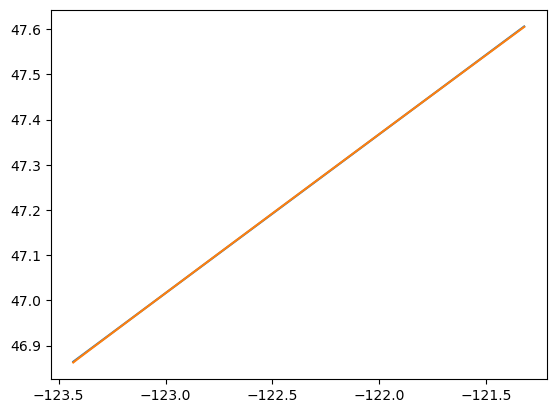

In [7]:
plt.plot(coords.nav_lon[1,:],coords.nav_lon[1,:]*0.35135207 + 90.23255615)
plt.plot(coords.nav_lon[1,:],coords.nav_lat[1,:])
#

In [19]:
coords.nav_lat[::2,::2]

<xarray.DataArray 'nav_lat' (y: 449, x: 199)>
array([[46.859665, 46.863426, 46.867188, ..., 47.59165 , 47.595356, 47.599068],
       [46.86607 , 46.87016 , 46.874092, ..., 47.599735, 47.603443, 47.607155],
       [46.87287 , 46.87702 , 46.881054, ..., 47.60782 , 47.61153 , 47.61524 ],
       ...,
       [50.369957, 50.374027, 50.378075, ..., 51.077724, 51.08098 , 51.08422 ],
       [50.377922, 50.38202 , 50.386078, ..., 51.085346, 51.088585, 51.09181 ],
       [50.385918, 50.39004 , 50.39411 , ..., 51.092983, 51.096207, 51.099407]],
      dtype=float32)
Dimensions without coordinates: y, x
Attributes:
    units:    degrees_north
    comment:  at t points

In [8]:
u = xr.open_dataset('/home/jvalenti/scratch/OParcels_runs/NEMO/SalishSea_1h_20190401_20190401_grid_T.nc')

In [9]:
u.sigma_theta[0,0,0,140].values

array(0., dtype=float32)

In [10]:
mask.totaldepth[0,140].values

array(0., dtype=float32)

In [11]:
def latT(lat):
    return np.cos(lat*(math.pi/180))

def count_inside_grid_cell(center_x, center_y, cell_width, cell_height, x,y):
    deg2met = 111319.5
    cell_width = cell_width/(deg2met*latT(center_y))
    cell_height = cell_height/deg2met
    min_x = np.array(center_x - cell_width / 2)
    max_x = np.array(center_x + cell_width / 2)
    min_y = np.array(center_y - cell_height / 2)
    max_y = np.array(center_y + cell_height / 2)
    inside_mask = np.logical_and.reduce([
        min_x[:, np.newaxis] <= x,
        x <= max_x[:, np.newaxis],
        min_y[:, np.newaxis] <= y,
        y <= max_y[:, np.newaxis]
    ])
    c = np.sum(inside_mask,axis=1)
    return c



ds = xr.open_dataset(filename[0],decode_times=False)
MFc = 5e6
zlevels = [0,5,10]
DS=ds.to_dataframe()
#DS = DS[DS.z < 800]
DS = DS[DS.status==1]
lat = coords.nav_lat
lon = coords.nav_lon
td = mask.totaldepth
cell_width = coords.e1t[0,:,:]
cell_height = coords.e2t[0,:,:]
x = np.array(DS.lon)
y = np.array(DS.lat)
z = np.array(DS.z)

In [12]:
(np.log(0.5)/np.log(1-0.001))*5

3464.002745892501

Text(0, 0.5, 'half-life (days)')

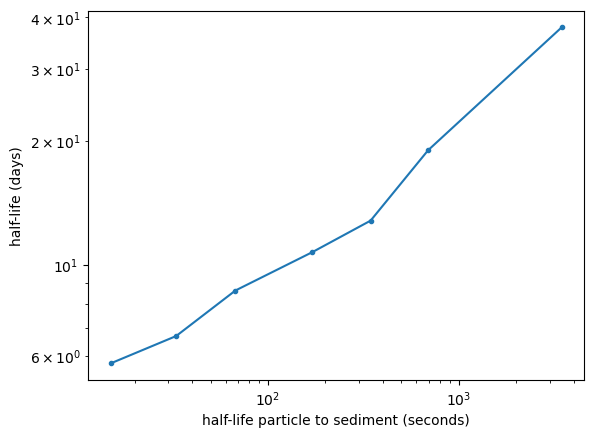

In [13]:
import matplotlib.pyplot as plt
x = [0.0001,0.0005,0.001,0.002,0.005,0.01,0.02]
x2  = [3464,691,345,171,67.5,33,15]
y = [37.85,19,12.8,10.73,8.65,6.7,5.75]
plt.loglog(x2,y,'.-')
plt.xlabel('half-life particle to sediment (seconds)')
plt.ylabel('half-life (days)')


In [14]:
conc = np.zeros((len(zlevels),coords.nav_lon.shape[0],coords.nav_lon.shape[1]))
for k in range(len(zlevels)):
    print(f'{k} level starting.')  
    for j in range(coords.nav_lon.shape[0]):
        zmin = int(zlevels[k])
        try:
            zmax = int(zlevels[k+1])
        except IndexError:
            zmax = 800
        X = x[np.logical_and(z >= zmin, z < zmax)]
        Y = y[np.logical_and(z >= zmin, z < zmax)]
        if zmax==800:
            BOXvolume = np.array((cell_width[j,:]* cell_height[j,:]*(td[j,:]-zmin)))
        else:
            BOXvolume = np.array((cell_width[j,:]* cell_height[j,:]*(zmax-zmin)))
        conc[k,j,:]+= count_inside_grid_cell(lon[j,:], lat[j,:], cell_width[j,:], cell_height[j,:],X,Y)*MFc/BOXvolume

0 level starting.


TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
str1 = "Correct cell not found for"
with open("/home/jvalenti/scratch/OParcels_runs/Parcels_alpha/results/stdaagoout","r") as movinf:
    listp = movinf.readlines()
lon = []
lat = []
for i in range(0, len(listp)):
    if str1 in listp[i]:
        # do something
        lat.append(listp[i].split('(')[1].split(',')[1].split(')')[0])
        lon.append(listp[i].split('(')[1].split(',')[0])

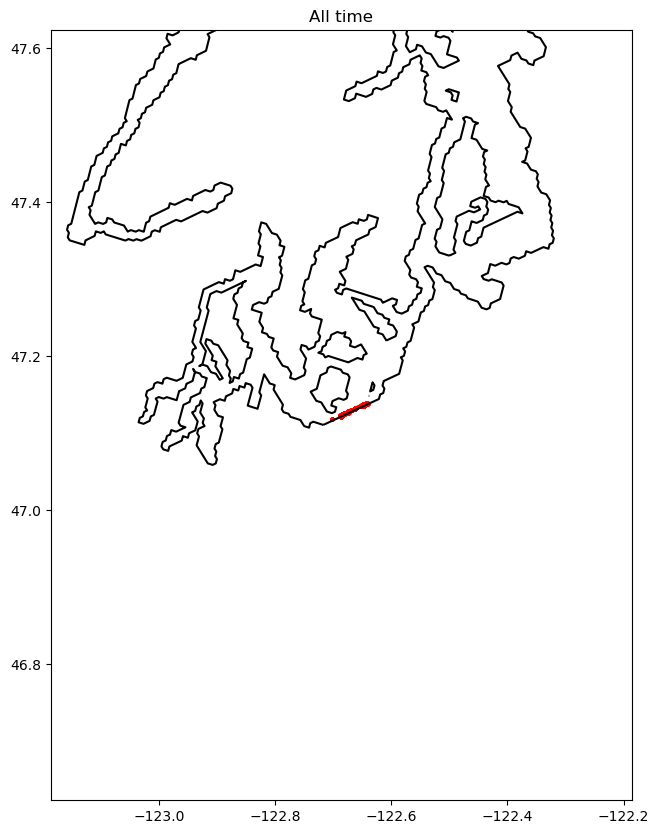

In [ ]:
from matplotlib import pyplot as plt, animation, rc,colors
import cmocean

cm = cmocean.cm.dense
#conc = np.load('/ocean/jvalenti/MOAD/concentration_31days.npy')
##ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
#ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
fig, ax = plt.subplots(1,1,figsize=(16, 10))
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
#aa = ax.contourf(coords.nav_lon, coords.nav_lat,mask.umask[0,0,:,:],levels = np.linspace(0,50,12), extend='both')
#aa.cmap.set_over('orange')
#aa.cmap.set_under('white')
#plt.colorbar(aa)
ax.set_aspect(1/np.sin(np.deg2rad(49)))
ax.set_title('All time')
plt.xlim(-122.685963-0.5,-122.685963+0.5)
plt.ylim(47.123597-0.5,47.123597+0.5)
plt.scatter(lon,lat,s=2,c='r')